In [1]:
print("hello parimal")

hello parimal


# Import the necessary libraries

In [2]:
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the data

In [3]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

In [4]:
print(xtrain.shape, ytrain.shape, xtest.shape, ytest.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


# Data Preprocessing

In [5]:
xtrain = xtrain/255
xtest = xtest/255

# Setting up the model

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28),),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(10, activation='sigmoid')
])


/home/parimal/.local/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

# Training the model

In [8]:
model.fit(xtrain, ytrain, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 997us/step - accuracy: 0.8516 - loss: 0.5085
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9583 - loss: 0.1397
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 989us/step - accuracy: 0.9693 - loss: 0.0994
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9750 - loss: 0.0770
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 991us/step - accuracy: 0.9792 - loss: 0.0663
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9834 - loss: 0.0528
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9851 - loss: 0.0476
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 987us/step - accuracy: 0.9874 - loss: 0.0377
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 984us/step - accuracy: 0.9881 - loss: 0.0361
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9894 - loss: 0.0330


# Model Evaluation

In [11]:
loss, accuracy = model.evaluate(xtest, ytest)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - accuracy: 0.9692 - loss: 0.1310
0.9732999801635742


In [14]:
y_pred = model.predict(xtest)
print(y_pred[1000])
print(ytest[1000])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step
[2.4160374e-07 3.3420871e-03 1.1445179e-06 3.8864651e-01 5.7001042e-01
 2.6585741e-04 1.7884640e-13 8.8173872e-01 4.8669740e-03 9.9999923e-01]
9


# np.argmax() --> returns the index of the maximum value present in the numpy array

In [16]:
arr = np.asarray([4, 5, 700, 900, 7])
print(np.argmax(arr))

3


In [19]:
y_pred_labels = [np.argmax(i) for i in y_pred]

print(y_pred_labels[1000])
print(ytest[1000])

9
9


In [21]:
from tensorflow.math import confusion_matrix

conf_mat = confusion_matrix(ytest, y_pred_labels)
print(conf_mat)

tf.Tensor(
[[ 967    0    0    1    0    0    6    2    4    0]
 [   0 1118    3    2    0    1    3    0    8    0]
 [   3    1 1005    1    4    0    5    3   10    0]
 [   1    1    8  976    0    9    0    3    7    5]
 [   0    0    0    1  965    1    8    4    1    2]
 [   1    0    1    9    1  866    8    0    5    1]
 [   6    2    1    0    3    8  935    2    1    0]
 [   2    5    9    5    2    0    0  992    8    5]
 [   3    0    4    4    4    8    3    2  946    0]
 [   1    4    0    4    9    5    2    5   17  962]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Values')

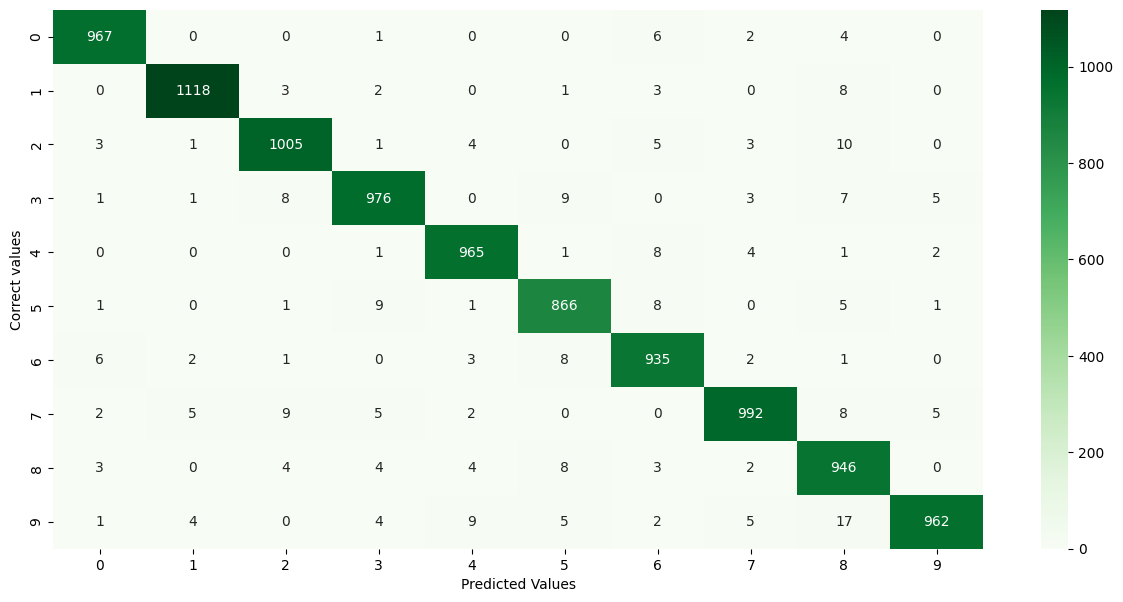

In [23]:
import seaborn as sns
plt.figure(figsize=(15, 7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Greens')
plt.ylabel("Correct values")
plt.xlabel("Predicted Values")

In [6]:
import cv2

img = cv2.imread("sample.webp")
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img = cv2.resize(img, (28, 28))
print(img.shape)

(28, 28)


In [ ]:
img = img/255